In [63]:
import pandas as pd
import plotly.express as px
import numpy as np 
import os
import matplotlib.pyplot as plt
import ast
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [2]:

# Set the path to your results folder
results_folder_path = r"C:\Users\krtej\Jupyter_folder\Standalone Projects\Results"

# Initialize empty DataFrames for each type
day_df = pd.DataFrame()
minute60_df = pd.DataFrame()
minute38_df = pd.DataFrame()

# Iterate through all folders in the results folder
for folder_name in os.listdir(results_folder_path):
    folder_path = os.path.join(results_folder_path, folder_name)
    
    # Check if the item in the folder is a directory
    if os.path.isdir(folder_path):
        
        # Read the three DataFrames from each folder
        day = pd.read_csv(os.path.join(folder_path, 'day.csv'))
        minute60 = pd.read_csv(os.path.join(folder_path, '60minute.csv'))
        minute38 = pd.read_csv(os.path.join(folder_path, '38minute.csv'))
        
        # Add a new column with the folder name
        day['Folder'] = folder_name
        minute60['Folder'] = folder_name
        minute38['Folder'] = folder_name
        
        # Concatenate the DataFrames
        day_df = pd.concat([day_df, day], ignore_index=True)
        minute60_df = pd.concat([minute60_df, minute60], ignore_index=True)
        minute38_df = pd.concat([minute38_df, minute38], ignore_index=True)

# Now, day_df, minute60_df, and minute38_df contain the combined data with an extra 'Folder' column


In [3]:
print(day_df.head())

  Profit_Loss_Windows                        ACC                   ADANIENT  \
0           (1, 0.33)  [46, 15, 31, 32.61, 1.48]  [43, 25, 18, 58.14, 1.26]   
1              (3, 1)  [42, 15, 27, 35.71, 3.76]  [41, 17, 24, 41.46, 2.34]   
2             (15, 5)  [21, 9, 12, 42.86, 35.19]   [33, 9, 23, 27.27, 10.0]   
3            (30, 10)     [12, 6, 5, 50.0, 97.5]   [20, 8, 11, 40.0, 35.35]   
4           (1, 0.33)  [31, 10, 21, 32.26, 1.23]   [26, 13, 13, 50.0, 1.38]   

                 ADANIGREEN                 ADANIPORTS  \
0  [14, 4, 10, 28.57, 1.14]  [54, 31, 23, 57.41, 1.31]   
1  [14, 4, 10, 28.57, 1.64]  [49, 23, 26, 46.94, 2.67]   
2   [12, 5, 6, 41.67, 9.83]  [31, 9, 22, 29.03, 20.16]   
3   [9, 4, 4, 44.44, 19.78]   [13, 5, 8, 38.46, 88.54]   
4     [7, 1, 6, 14.29, 1.0]   [32, 16, 16, 50.0, 1.34]   

                   AMBUJACEM                 APOLLOHOSP  \
0  [54, 24, 30, 44.44, 1.37]  [45, 19, 26, 42.22, 1.27]   
1  [53, 24, 29, 45.28, 2.96]  [43, 17, 26, 39.53, 2.47]   

In [4]:
minute60_df

Profit_Loss_Windows                            ACC  \
0            (1, 0.33)   [361, 117, 244, 32.41, 3.65]   
1               (3, 1)   [272, 90, 182, 33.09, 14.19]   
2              (15, 5)    [48, 14, 34, 29.17, 219.65]   
3             (30, 10)      [14, 5, 8, 35.71, 843.21]   
4            (1, 0.33)    [249, 85, 164, 34.14, 3.33]   
5               (3, 1)   [204, 63, 141, 30.88, 11.79]   
6              (15, 5)    [44, 15, 29, 34.09, 230.34]   
7             (30, 10)     [17, 6, 10, 35.29, 676.88]   
8            (1, 0.33)   [348, 114, 234, 32.76, 3.65]   
9               (3, 1)   [266, 88, 178, 33.08, 13.92]   
10             (15, 5)    [49, 14, 35, 28.57, 213.39]   
11            (30, 10)      [14, 5, 8, 35.71, 843.21]   
12           (1, 0.33)    [177, 62, 114, 35.03, 3.73]   
13              (3, 1)   [154, 47, 106, 30.52, 15.23]   
14             (15, 5)    [39, 11, 27, 28.21, 243.56]   
15            (30, 10)        [16, 6, 9, 37.5, 677.0]   
16           (1, 0.33)         [14, 7, 7, 50.0, 5.21]   
17              (3, 1)      [13, 3, 10, 23.08, 19.54]   
18             (15, 5)        [10, 2, 8, 20.0, 226.1]   
19            (30, 10)       [9, 3, 6, 33.33, 474.89]   
20           (1, 0.33)       [21, 7, 14, 33.33, 3.29]   
21              (3, 1)      [18, 7, 11, 38.89, 14.33]   
22             (15, 5)      [16, 4, 12, 25.0, 176.75]   
23            (30, 10)        [8, 2, 5, 25.0, 662.88]   
24           (1, 0.33)      [49, 16, 33, 32.65, 3.41]   
25              (3, 1)      [42, 17, 25, 40.48, 17.4]   
26             (15, 5)     [28, 6, 22, 21.43, 176.79]   
27            (30, 10)      [13, 4, 8, 30.77, 668.15]   
28           (1, 0.33)   [627, 220, 407, 35.09, 3.67]   
29              (3, 1)  [384, 118, 265, 30.73, 13.66]   
30             (15, 5)    [57, 17, 39, 29.82, 200.54]   
31            (30, 10)       [20, 7, 12, 35.0, 610.1]   

                        ADANIENT                    ADANIGREEN  \
0   [373, 157, 216, 42.09, 2.24]   [196, 81, 115, 41.33, 2.63]   
1   [311, 112, 199, 36.01, 7.65]    [165, 57, 108, 34.55, 6.3]   
2     [112, 42, 69, 37.5, 73.26]    [74, 29, 44, 39.19, 58.78]   
3    [47, 20, 26, 42.55, 227.51]   [38, 16, 21, 42.11, 139.68]   
4   [252, 109, 143, 43.25, 2.15]    [152, 63, 89, 41.45, 2.51]   
5     [218, 76, 142, 34.86, 7.5]    [132, 39, 93, 29.55, 5.12]   
6    [101, 37, 63, 36.63, 66.74]     [68, 26, 41, 38.24, 59.0]   
7     [49, 19, 29, 38.78, 199.0]   [39, 17, 21, 43.59, 132.56]   
8    [365, 154, 211, 42.19, 2.2]    [190, 76, 114, 40.0, 2.63]   
9    [304, 109, 195, 35.86, 7.7]    [159, 52, 107, 32.7, 6.18]   
10    [112, 42, 69, 37.5, 72.49]    [74, 29, 44, 39.19, 58.32]   
11   [47, 20, 26, 42.55, 224.98]   [38, 16, 21, 42.11, 139.68]   
12    [146, 55, 91, 37.67, 2.28]     [73, 36, 37, 49.32, 2.63]   
13    [137, 54, 82, 39.42, 6.51]     [71, 30, 41, 42.25, 6.03]   
14    [77, 32, 44, 41.56, 79.25]     [40, 18, 21, 45.0, 59.98]   
15   [34, 15, 18, 44.12, 265.47]     [24, 15, 8, 62.5, 144.83]   
16          [5, 4, 1, 80.0, 1.6]         [7, 3, 4, 42.86, 2.0]   
17          [4, 3, 1, 75.0, 3.0]        [7, 2, 5, 28.57, 5.86]   
18         [4, 2, 2, 50.0, 33.5]        [6, 3, 3, 50.0, 87.83]   
19        [4, 2, 2, 50.0, 303.0]        [4, 3, 0, 75.0, 185.0]   
20        [9, 6, 3, 66.67, 2.56]          [5, 2, 3, 40.0, 2.8]   
21        [9, 6, 3, 66.67, 6.11]          [5, 2, 3, 40.0, 8.2]   
22        [8, 5, 3, 62.5, 82.38]         [5, 4, 1, 80.0, 53.8]   
23       [8, 4, 4, 50.0, 467.12]        [4, 3, 0, 75.0, 132.5]   
24     [35, 15, 20, 42.86, 2.69]      [18, 6, 12, 33.33, 2.94]   
25     [34, 11, 23, 32.35, 6.24]         [15, 6, 9, 40.0, 7.6]   
26    [23, 12, 11, 52.17, 94.74]      [14, 9, 5, 64.29, 56.71]   
27     [17, 9, 8, 52.94, 291.59]     [11, 7, 3, 63.64, 184.64]   
28  [645, 257, 388, 39.84, 2.17]  [431, 157, 274, 36.43, 2.41]   
29   [458, 142, 316, 31.0, 6.75]  [307, 106, 201, 34.53, 6.15]   
30   [134, 45, 88, 33.58, 67.73]    [94, 33, 60, 35.11, 55.48]   
31   [51,

In [5]:
minute38_df

Profit_Loss_Windows                            ACC  \
0            (1, 0.33)   [518, 180, 338, 34.75, 4.48]   
1               (3, 1)  [356, 119, 237, 33.43, 18.94]   
2              (15, 5)    [56, 16, 39, 28.57, 271.41]   
3             (30, 10)     [21, 7, 13, 33.33, 774.52]   
4            (1, 0.33)   [346, 125, 221, 36.13, 4.07]   
5               (3, 1)   [264, 92, 172, 34.85, 19.06]   
6              (15, 5)     [50, 15, 34, 30.0, 294.52]   
7             (30, 10)     [18, 6, 11, 33.33, 788.72]   
8            (1, 0.33)   [498, 171, 327, 34.34, 4.51]   
9               (3, 1)  [349, 114, 235, 32.66, 18.88]   
10             (15, 5)    [56, 16, 39, 28.57, 271.21]   
11            (30, 10)     [21, 7, 13, 33.33, 774.52]   
12           (1, 0.33)    [212, 76, 136, 35.85, 5.42]   
13              (3, 1)   [189, 65, 123, 34.39, 21.03]   
14             (15, 5)     [35, 12, 22, 34.29, 403.2]   
15            (30, 10)     [17, 6, 10, 35.29, 906.94]   
16           (1, 0.33)       [26, 8, 18, 30.77, 5.31]   
17              (3, 1)       [24, 9, 15, 37.5, 18.75]   
18             (15, 5)     [17, 6, 11, 35.29, 345.47]   
19            (30, 10)       [10, 5, 5, 50.0, 1040.6]   
20           (1, 0.33)       [26, 5, 21, 19.23, 4.23]   
21              (3, 1)     [24, 11, 13, 45.83, 23.25]   
22             (15, 5)     [19, 5, 14, 26.32, 272.42]   
23            (30, 10)       [11, 5, 6, 45.45, 895.0]   
24           (1, 0.33)      [64, 21, 43, 32.81, 4.97]   
25              (3, 1)      [54, 25, 29, 46.3, 21.76]   
26             (15, 5)     [29, 9, 20, 31.03, 276.03]   
27            (30, 10)        [15, 6, 9, 40.0, 768.4]   
28           (1, 0.33)    [823, 270, 553, 32.81, 4.3]   
29              (3, 1)  [468, 140, 328, 29.91, 18.69]   
30             (15, 5)    [54, 17, 36, 31.48, 296.85]   
31            (30, 10)     [23, 7, 15, 30.43, 721.57]   

                        ADANIENT                    ADANIGREEN  \
0   [518, 220, 298, 42.47, 2.49]  [279, 106, 173, 37.99, 3.18]   
1    [419, 161, 258, 38.42, 9.2]   [228, 68, 160, 29.82, 8.11]   
2    [132, 51, 80, 38.64, 92.67]    [87, 28, 58, 32.18, 69.16]   
3    [51, 21, 29, 41.18, 288.45]   [43, 17, 25, 39.53, 160.86]   
4   [344, 153, 191, 44.48, 2.41]   [206, 80, 126, 38.83, 3.12]   
5   [285, 102, 183, 35.79, 8.77]   [174, 50, 124, 28.74, 7.63]   
6    [114, 43, 70, 37.72, 94.98]     [75, 21, 53, 28.0, 68.85]   
7    [48, 19, 28, 39.58, 290.73]    [40, 16, 23, 40.0, 164.32]   
8   [495, 211, 284, 42.63, 2.51]  [270, 103, 167, 38.15, 3.16]   
9   [402, 152, 250, 37.81, 9.26]    [221, 66, 155, 29.86, 8.0]   
10   [128, 50, 77, 39.06, 95.04]    [85, 27, 57, 31.76, 69.42]   
11   [51, 21, 29, 41.18, 286.69]   [43, 17, 25, 39.53, 159.98]   
12   [194, 77, 117, 39.69, 2.93]     [114, 35, 79, 30.7, 3.13]   
13   [180, 66, 113, 36.67, 9.42]     [108, 31, 77, 28.7, 8.34]   
14    [86, 36, 49, 41.86, 112.5]     [63, 24, 38, 38.1, 65.06]   
15   [45, 19, 25, 42.22, 278.62]   [37, 16, 20, 43.24, 164.89]   
16      [19, 8, 11, 42.11, 2.21]      [13, 3, 10, 23.08, 2.23]   
17       [19, 6, 13, 31.58, 8.0]       [13, 3, 10, 23.08, 5.0]   
18     [16, 7, 9, 43.75, 114.56]      [11, 5, 6, 45.45, 82.55]   
19     [11, 6, 5, 54.55, 369.64]     [11, 6, 5, 54.55, 204.18]   
20       [20, 11, 9, 55.0, 2.05]        [12, 4, 8, 33.33, 3.5]   
21      [17, 6, 11, 35.29, 7.41]       [11, 2, 9, 18.18, 6.36]   
22      [12, 3, 9, 25.0, 124.25]       [9, 4, 4, 44.44, 61.78]   
23     [11, 4, 7, 36.36, 261.73]        [8, 3, 4, 37.5, 156.5]   
24      [46, 20, 26, 43.48, 2.5]      [30, 12, 18, 40.0, 3.23]   
25     [39, 13, 26, 33.33, 8.38]      [28, 9, 19, 32.14, 8.43]   
26    [27, 8, 19, 29.63, 140.22]     [19, 8, 10, 42.11, 80.68]   
27     [24, 9, 15, 37.5, 293.17]     [15, 7, 7, 46.67, 167.07]   
28  [891, 379, 512, 42.54, 2.59]  [552, 184, 368, 33.33, 3.01]   
29   [582, 213, 369, 36.6, 9.76]   [366, 111, 254, 30.33, 8.0]   
30    [148, 49, 98, 33.11, 90.1]   [108, 37, 70, 34.26, 65.44]   
31   [61,

In [6]:
grouped_df = day_df.groupby('Profit_Loss_Windows')

# Create a dictionary to store DataFrames for each group
dfs = {}

# Iterate through groups, drop 'Profit_Loss_Windows', and store DataFrames in the dictionary
for name, group in grouped_df:
    dfs[name] = group.drop(columns=['Profit_Loss_Windows']).copy()

In [8]:
def convert_to_list(cell_value):
    try:
        # Use ast.literal_eval to safely evaluate the string representation
        return ast.literal_eval(cell_value)
    except (SyntaxError, ValueError):
        return cell_value  # Return the original value if evaluation fails

# Apply the custom function to the entire DataFrame
df = df.applymap(convert_to_list)

C:\Users\krtej\AppData\Local\Temp\ipykernel_16252\2760758204.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(convert_to_list)


In [9]:
df

ACC                   ADANIENT  \
0   [46, 15, 31, 32.61, 1.48]  [43, 25, 18, 58.14, 1.26]   
4   [31, 10, 21, 32.26, 1.23]   [26, 13, 13, 50.0, 1.38]   
8   [44, 15, 29, 34.09, 1.45]  [42, 24, 18, 57.14, 1.26]   
12  [23, 11, 12, 47.83, 1.52]     [20, 9, 11, 45.0, 1.4]   
16        [1, 0, 1, 0.0, 1.0]       [2, 1, 1, 50.0, 1.5]   
20        [2, 0, 2, 0.0, 1.0]        [1, 0, 1, 0.0, 1.0]   
24      [8, 2, 6, 25.0, 1.12]      [3, 1, 2, 33.33, 1.0]   
28  [91, 37, 54, 40.66, 1.42]  [96, 46, 50, 47.92, 1.25]   

                   ADANIGREEN                 ADANIPORTS  \
0    [14, 4, 10, 28.57, 1.14]  [54, 31, 23, 57.41, 1.31]   
4       [7, 1, 6, 14.29, 1.0]   [32, 16, 16, 50.0, 1.34]   
8    [14, 4, 10, 28.57, 1.14]   [50, 29, 21, 58.0, 1.36]   
12      [8, 3, 5, 37.5, 1.62]  [30, 11, 19, 36.67, 1.87]   
16            [0, 0, 0, 0, 0]     [3, 1, 2, 33.33, 1.67]   
20      [1, 1, 0, 100.0, 2.0]       [3, 0, 3, 0.0, 1.33]   
24     [3, 3, 0, 100.0, 1.33]       [6, 0, 6, 0.0, 1.33]   
28  [39, 13, 26, 33.33, 1.15]   [97, 41, 56, 42.27, 1.4]   

                    AMBUJACEM                  APOLLOHOSP  \
0   [54, 24, 30, 44.44, 1.37]   [45, 19, 26, 42.22, 1.27]   
4   [32, 14, 18, 43.75, 1.25]   [33, 14, 19, 42.42, 1.24]   
8    [51, 23, 28, 45.1, 1.37]   [44, 18, 26, 40.91, 1.27]   
12   [26, 9, 17, 34.62, 1.73]    [23, 5, 18, 21.74, 1.65]   
16      [1, 1, 0, 100.0, 5.0]       [1, 1, 0, 100.0, 2.0]   
20            [0, 0, 0, 0, 0]       [2, 2, 0, 100.0, 1.5]   
24       [5, 2, 3, 40.0, 1.8]      [6, 2, 4, 33.33, 1.17]   
28  [81, 46, 35, 56.79, 1.48]  [102, 48, 54, 47.06, 1.41]   

                   ASIANPAINT                  AUROPHARMA  \
0   [45, 24, 21, 53.33, 1.51]   [77, 37, 40, 48.05, 1.29]   
4   [22, 10, 12, 45.45, 1.64]   [52, 22, 30, 42.31, 1.21]   
8   [41, 21, 20, 51.22, 1.46]   [74, 36, 38, 48.65, 1.28]   
12  [27, 16, 11, 59.26, 1.93]    [22, 9, 13, 40.91, 1.45]   
16            [0, 0, 0, 0, 0]       [1, 1, 0, 100.0, 2.0]   
20            [0, 0, 0, 0, 0]        [2, 1, 1, 50.0, 2.0]   
24      [6, 3, 3, 50.0, 3.33]       [4, 2, 2, 50.0, 2.25]   
28  [63, 26, 36, 41.27, 1.65]  [115, 48, 67, 41.74, 1.24]   

                     AXISBANK                 BAJAJ-AUTO  ...  \
0    [51, 23, 28, 45.1, 1.41]  [57, 25, 32, 43.86, 1.68]  ...   
4   [31, 12, 19, 38.71, 1.39]  [37, 14, 23, 37.84, 1.81]  ...   
8    [50, 22, 28, 44.0, 1.42]  [56, 25, 31, 44.64, 1.68]  ...   
12    [28, 14, 14, 50.0, 1.5]   [27, 9, 18, 33.33, 1.67]  ...   
16      [3, 1, 2, 33.33, 1.0]     [3, 1, 2, 33.33, 1.67]  ...   
20        [1, 0, 1, 0.0, 2.0]      [4, 2, 2, 50.0, 1.25]  ...   
24       [4, 0, 4, 0.0, 1.25]      [7, 5, 2, 71.43, 2.0]  ...   
28  [88, 36, 52, 40.91, 1.28]  [92, 42, 50, 45.65, 1.66]  ...   

                          TCS                      TECHM  \
0   [46, 22, 24, 47.83, 1.46]  [49, 25, 24, 51.02, 1.55]   
4   [31, 16, 15, 51.61, 1.39]  [33, 15, 18, 45.45, 1.52]   
8    [44, 20, 24, 45.45, 1.7]  [47, 24, 23, 51.06, 1.57]   
12  [23, 11, 12, 47.83, 1.65]    [14, 8, 6, 57.14, 1.14]   
16        [1, 0, 1, 0.0, 1.0]        [1, 0, 1, 0.0, 2.0]   
20            [0, 0, 0, 0, 0]        [1, 0, 1, 0.0, 4.0]   
24     [3, 1, 2, 33.33, 1.67]      [8, 2, 6, 25.0, 1.88]   
28  [82, 35, 47, 42.68, 1.65]  [92, 37, 55, 40.22, 1.39]   

                        TITAN                 TORNTPHARM  \
0   [46, 20, 26, 43.48, 1.39]  [48, 26, 22, 54.17, 1.23]   
4   [33, 12, 21, 36.36, 1.42]  [29, 15, 14, 51.72, 1.28]   
8    [43, 17, 26, 39.53, 1.4]  [47, 26, 21, 55.32, 1.21]   
12   [27, 8, 19, 29.63, 1.52]   [22, 8, 14, 36.36, 1.73]   
16      [4, 3, 1, 75.0, 1.75]      [1, 1, 0, 100.0, 1.0]   
20        [2, 0, 2, 0.0, 1.0]     [3, 2, 1, 66.67, 3.33]   
24     [3, 1, 2, 33.33, 1.33]       [5, 2, 3, 40.0, 2.4]   
28  [75, 41, 34, 54.67, 1.53]  [79, 39, 40, 49.37, 1.47]   

                   ULTRACEMCO                        UPL  \
0   [55, 23, 32, 41.82, 1.33]  [62, 24, 38, 38.71, 1.16]   
4    [38, 19, 19, 50.0, 1.32]  [35, 15, 20, 42.86, 1.11]

In [10]:
def extract_fourth_element(lst):
    if len(lst) >= 4:
        return lst[3]
    else:
        return None  # Handle the case where the list has fewer than 4 elements

for key, df in dfs.items():
    dfs[key] = df.map(convert_to_list)


In [11]:
def extract_fourth_element(lst):
    if len(lst) >= 4:
        return lst[3]
    else:
        return None  # Handle the case where the list has fewer than 4 elements

# Extract the fourth element from each DataFrame in the dictionary
for key, df in dfs.items():
    # Apply the function to all columns except the last one
    df.iloc[:, :-1] = df.iloc[:, :-1].apply(lambda col: col.map(extract_fourth_element))

In [12]:
dfs['(1, 0.33)']

ACC ADANIENT ADANIGREEN ADANIPORTS AMBUJACEM APOLLOHOSP ASIANPAINT  \
0   32.61    58.14      28.57      57.41     44.44      42.22      53.33   
4   32.26     50.0      14.29       50.0     43.75      42.42      45.45   
8   34.09    57.14      28.57       58.0      45.1      40.91      51.22   
12  47.83     45.0       37.5      36.67     34.62      21.74      59.26   
16    0.0     50.0        0.0      33.33     100.0      100.0        0.0   
20    0.0      0.0      100.0        0.0       0.0      100.0        0.0   
24   25.0    33.33      100.0        0.0      40.0      33.33       50.0   
28  40.66    47.92      33.33      42.27     56.79      47.06      41.27   

   AUROPHARMA AXISBANK BAJAJ-AUTO  ...    TCS  TECHM  TITAN TORNTPHARM  \
0       48.05     45.1      43.86  ...  47.83  51.02  43.48      54.17   
4       42.31    38.71      37.84  ...  51.61  45.45  36.36      51.72   
8       48.65     44.0      44.64  ...  45.45  51.06  39.53      55.32   
12      40.91     50.0      33.33  ...  47.83  57.14  29.63      36.36   
16      100.0    33.33      33.33  ...    0.0    0.0   75.0      100.0   
20       50.0      0.0       50.0  ...    0.0    0.0    0.0      66.67   
24       50.0      0.0      71.43  ...  33.33   25.0  33.33       40.0   
28      41.74    40.91      45.65  ...  42.68  40.22  54.67      49.37   

   ULTRACEMCO    UPL   VEDL  WIPRO YESBANK     Folder  
0       41.82  38.71  37.25  42.59   51.61         BB  
4        50.0  42.86  36.36  36.84   54.35      BBRSI  
8       41.82  37.93  36.96  45.28   51.61   BBRSI-UC  
12       50.0   40.0  43.75  47.06    50.0         MA  
16       50.0    0.0  100.0    0.0     0.0    MARSI-C  
20        0.0    0.0    0.0  100.0   100.0  MARSI-UC1  
24       50.0    0.0  33.33   50.0   100.0  MARSI-UC2  
28      44.83  51.22   42.2  46.08   48.28        RSI  

[8 rows x 102 columns]

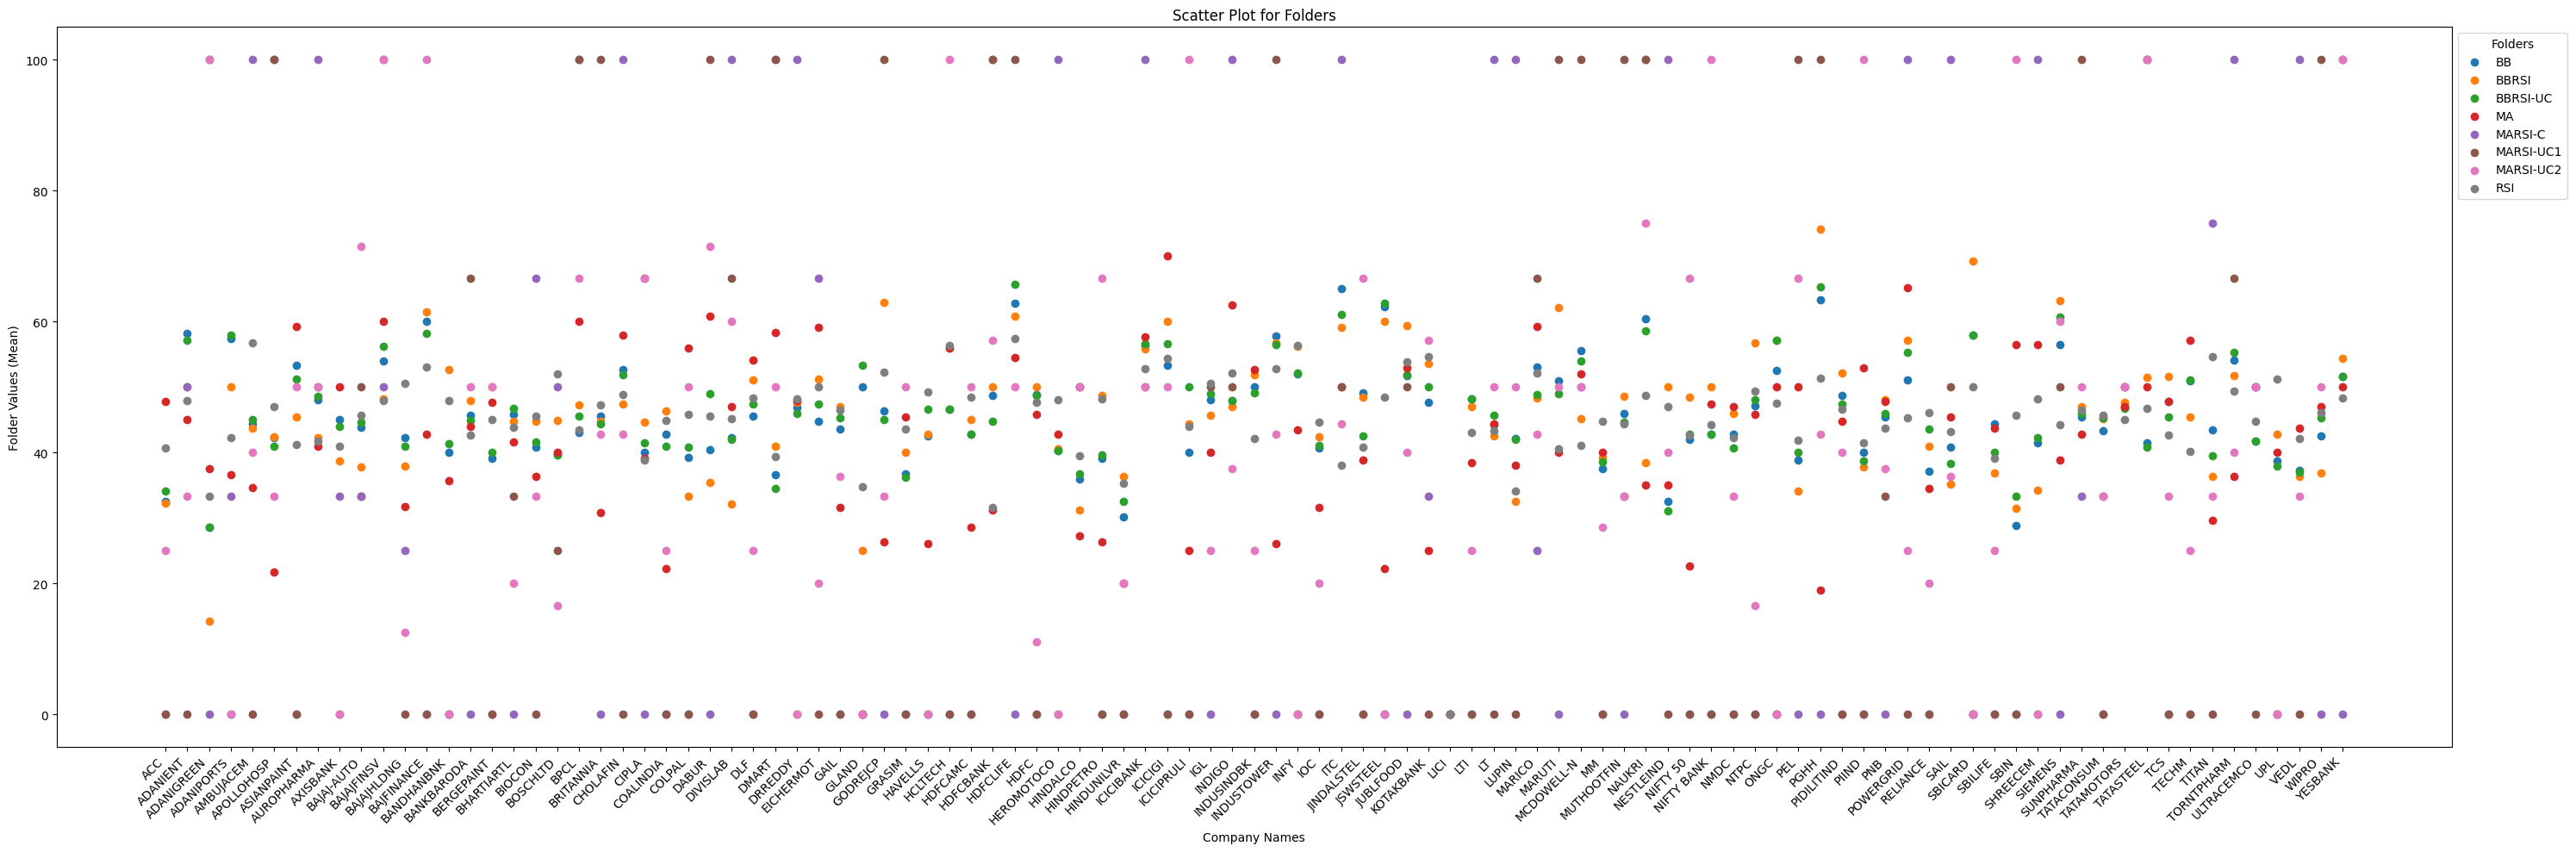

In [45]:
companies = df.iloc[:, :-1]
folders = df.iloc[:, -1]

# Plotting
fig, ax = plt.subplots(figsize=(30, 10))
for i, folder_name in enumerate(folders.unique()):
    folder_data = df[df.iloc[:, -1] == folder_name].iloc[:, :-1]
    ax.scatter(companies.columns, folder_data.mean(), label=folder_name)

# Customize the plot
ax.set_xlabel('Company Names')
ax.set_ylabel('Folder Values (Mean)')
ax.set_title('Scatter Plot for Folders')
ax.legend(title='Folders', bbox_to_anchor=(1, 1))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

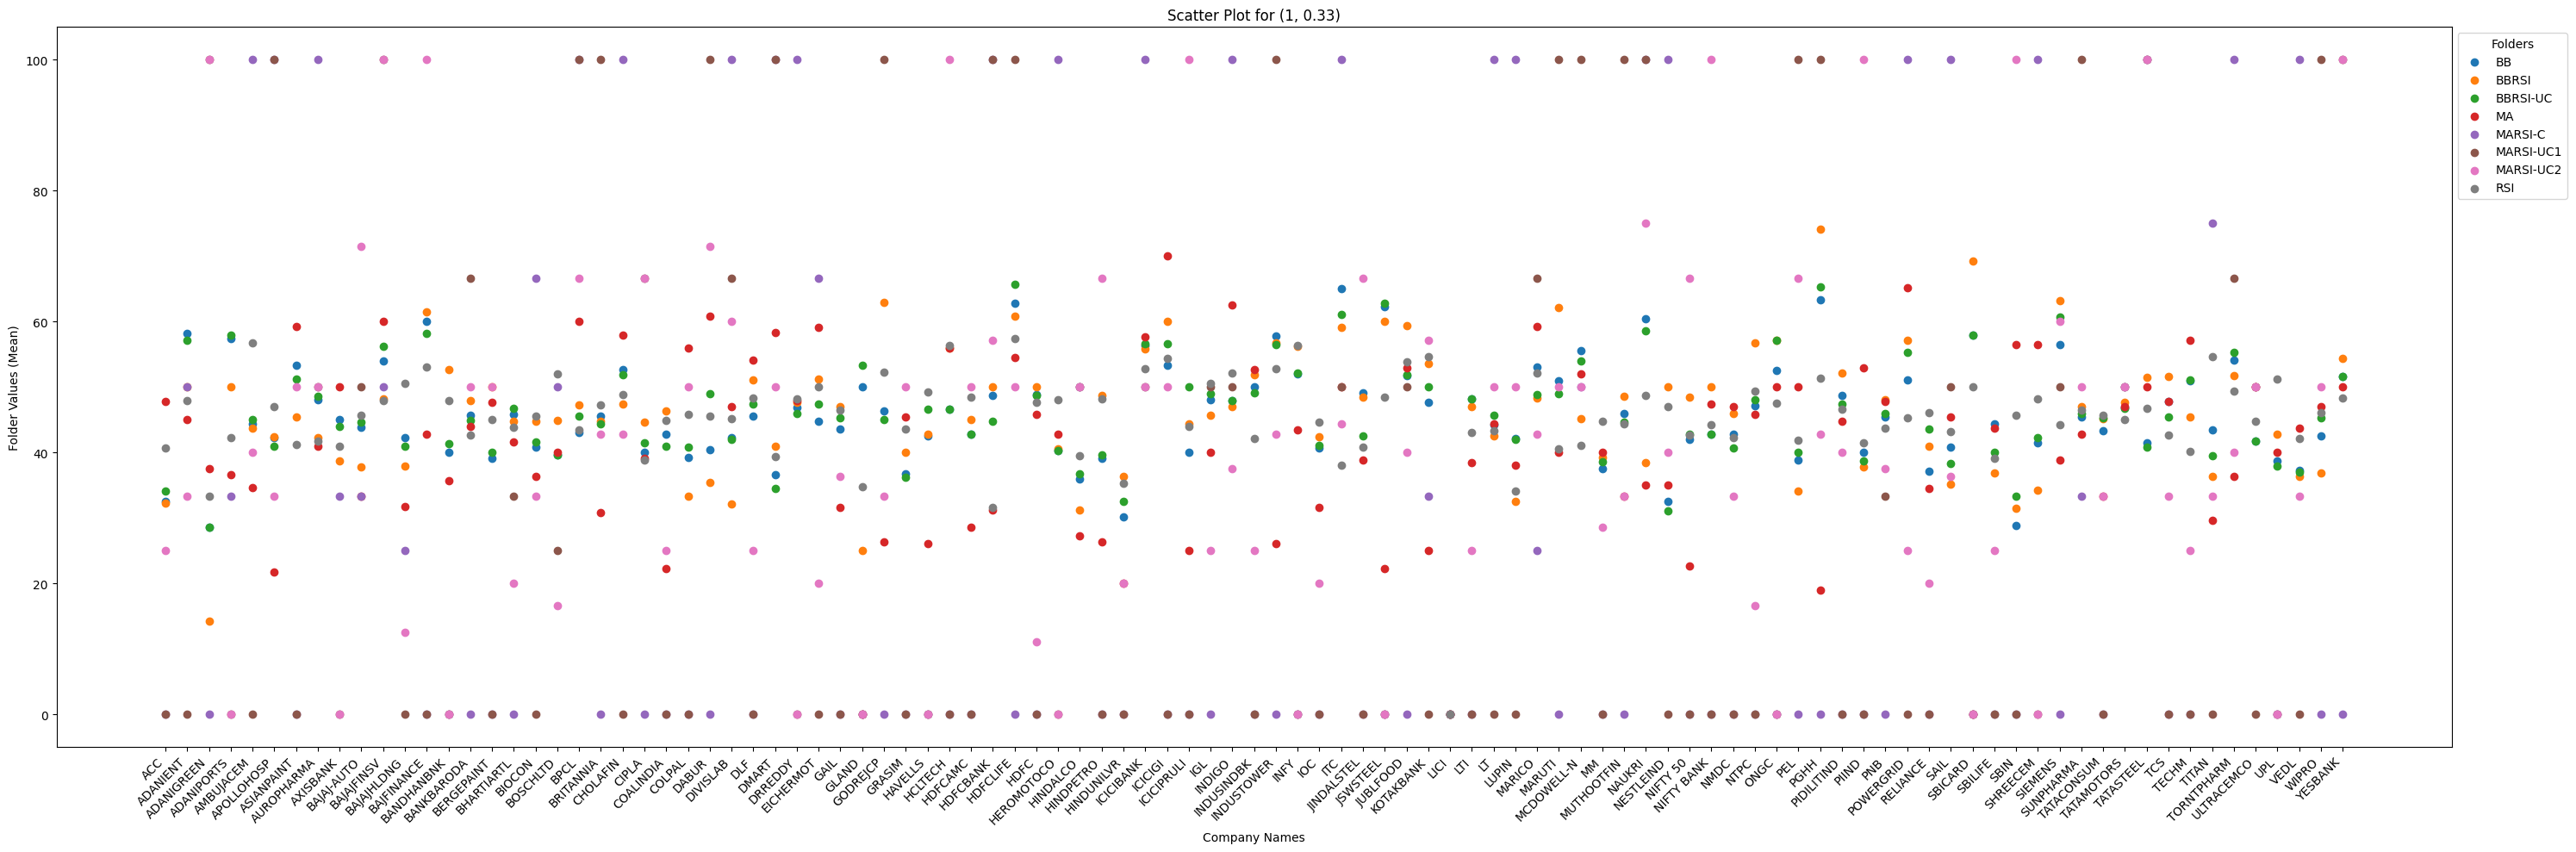

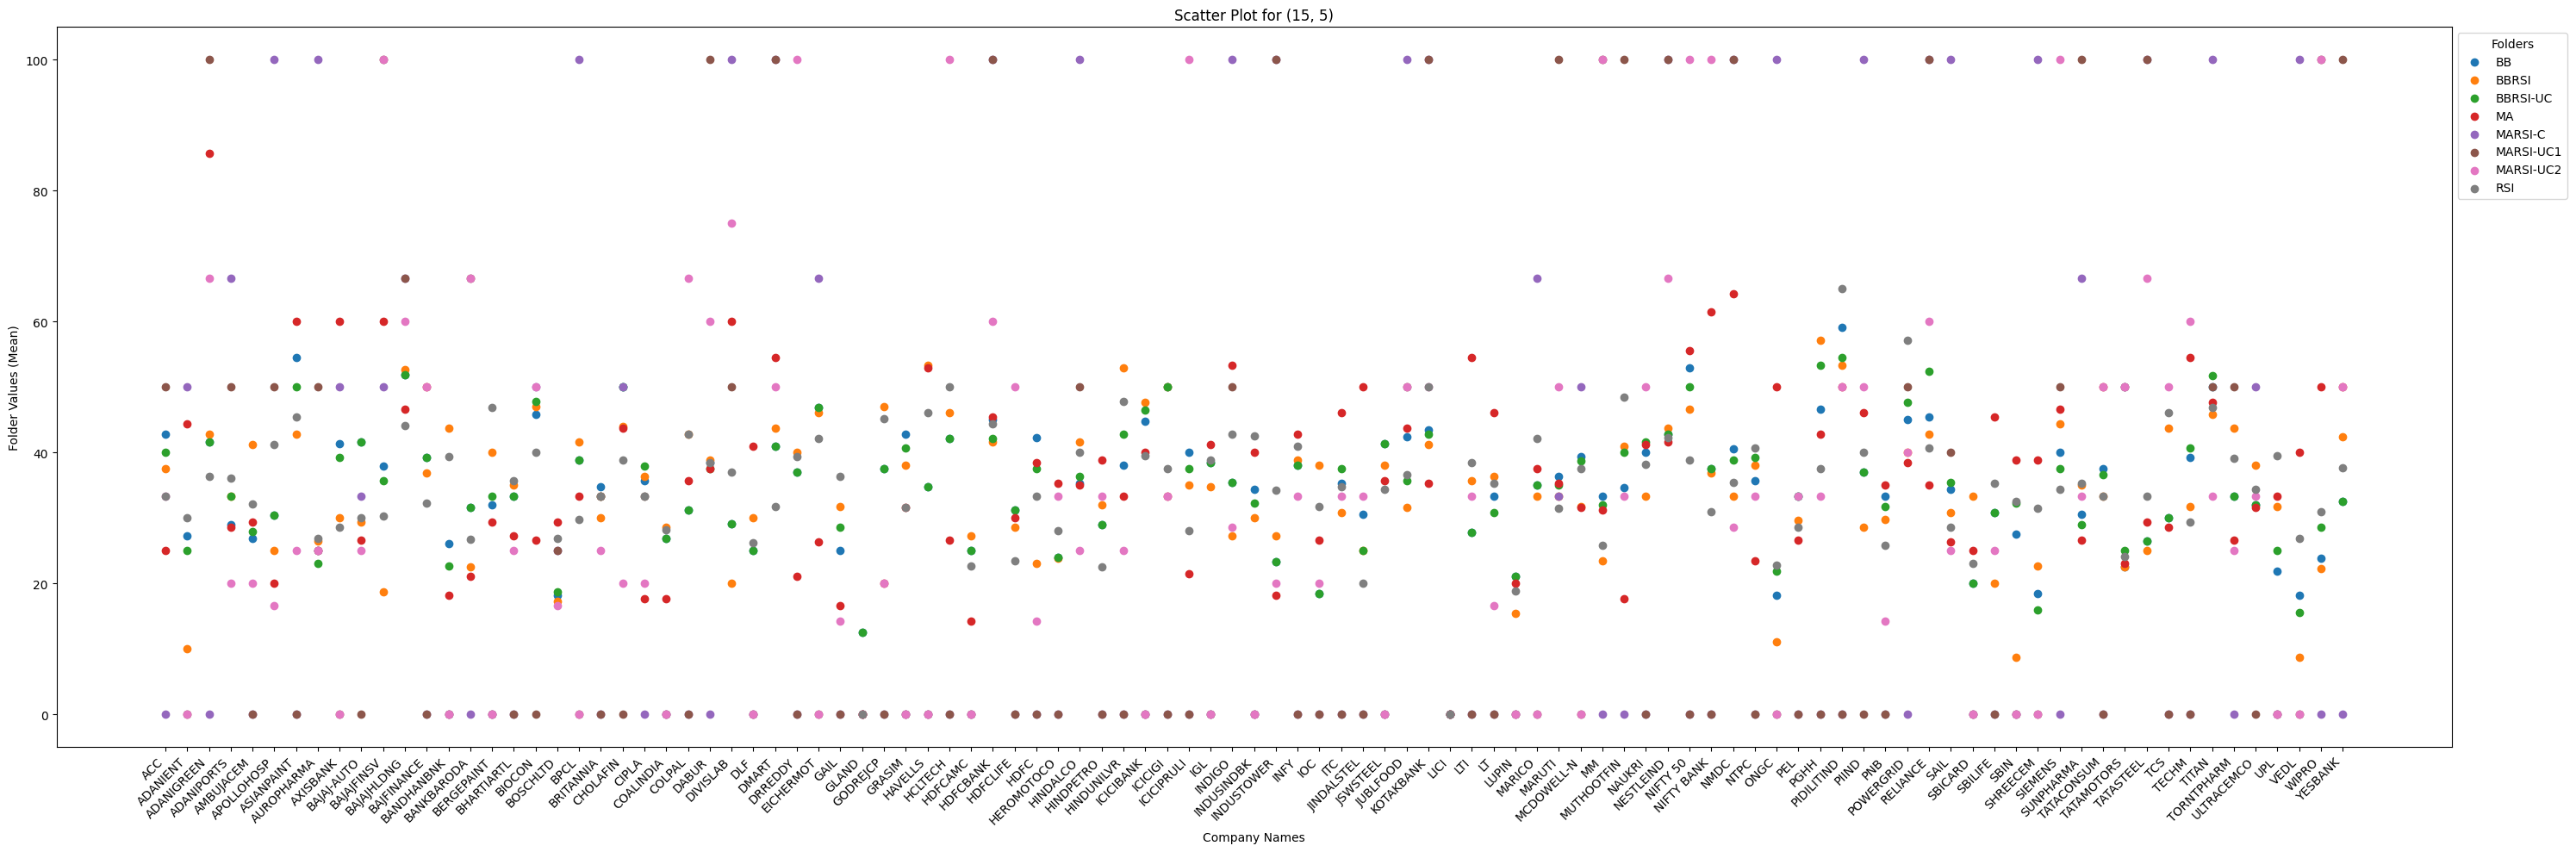

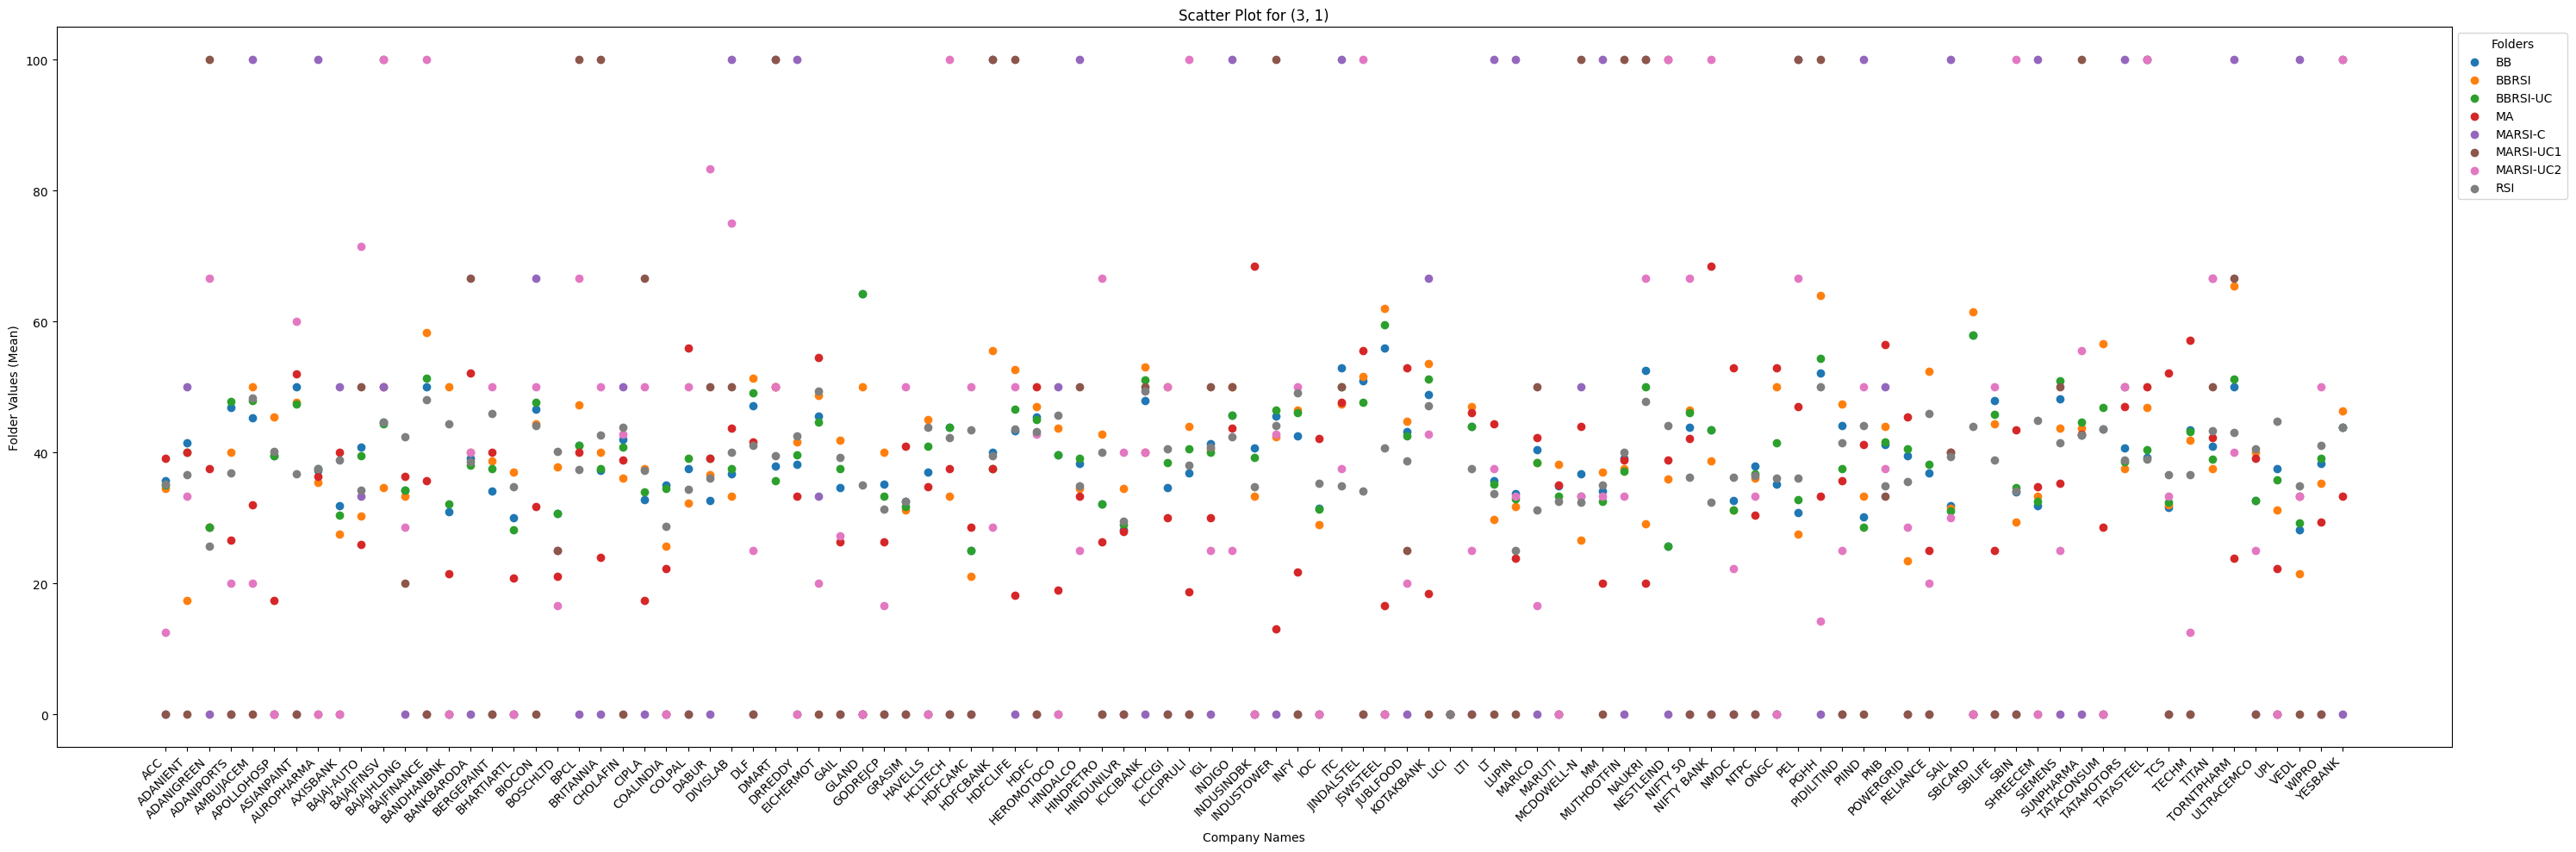

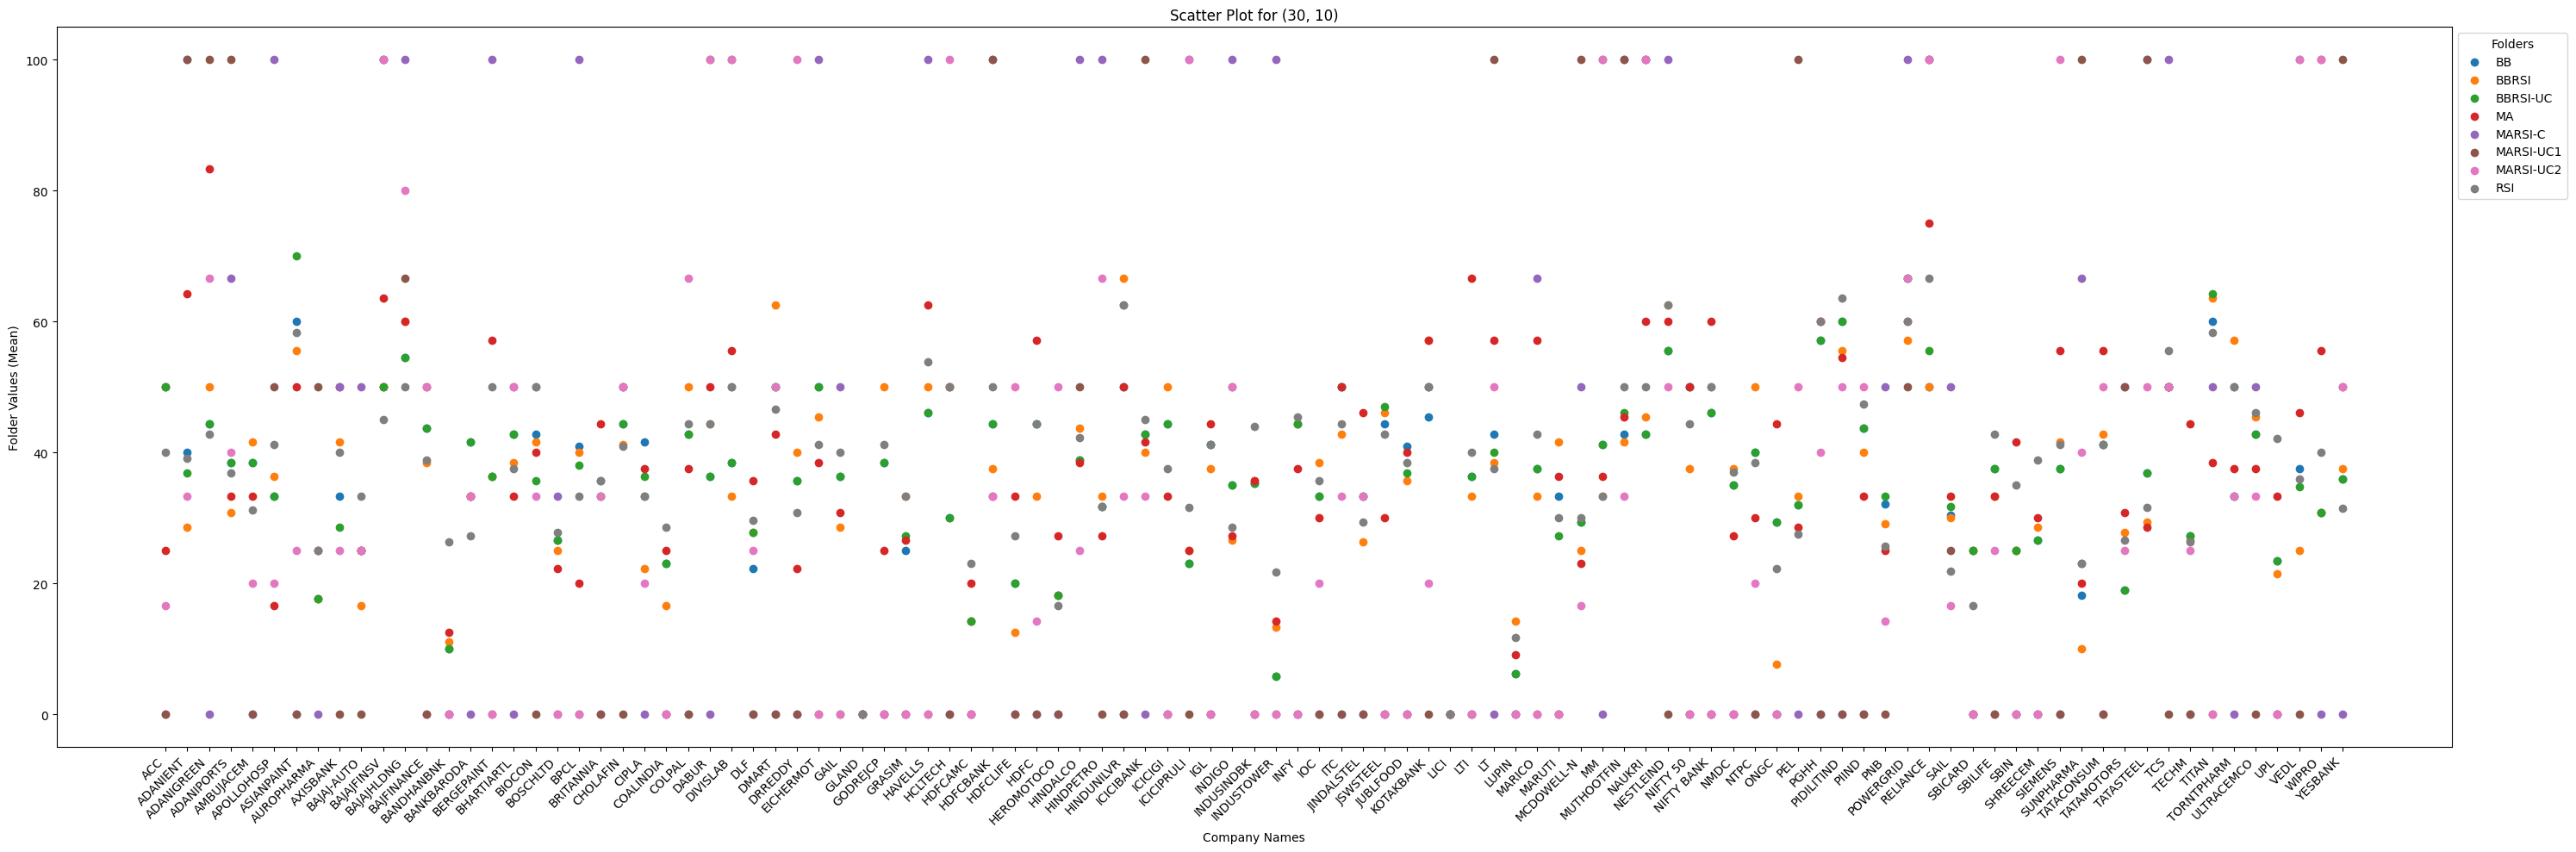

In [48]:
for df_name, df in dfs.items():
    # Extract company names and folder values
    companies = df.iloc[:, :-1]
    folders = df.iloc[:, -1]

    # Plotting
    fig, ax = plt.subplots(figsize=(30, ))
    for i, folder_name in enumerate(folders.unique()):
        folder_data = df[df.iloc[:, -1] == folder_name].iloc[:, :-1]
        ax.scatter(companies.columns, folder_data.mean(), label=folder_name)

    # Customize the plot
    ax.set_xlabel('Company Names')
    ax.set_ylabel('Folder Values (Mean)')
    ax.set_title(f'Scatter Plot for {df_name}')
    ax.legend(title='Folders', bbox_to_anchor=(1, 1))

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Show the plot
    plt.tight_layout()
    plt.show()

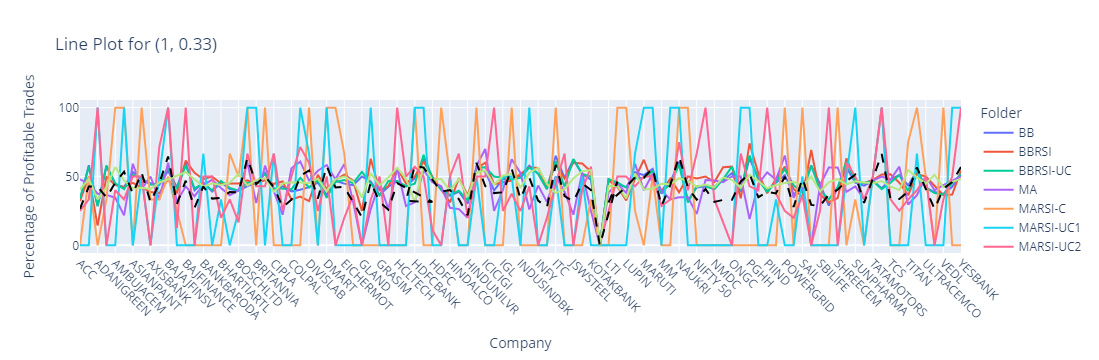

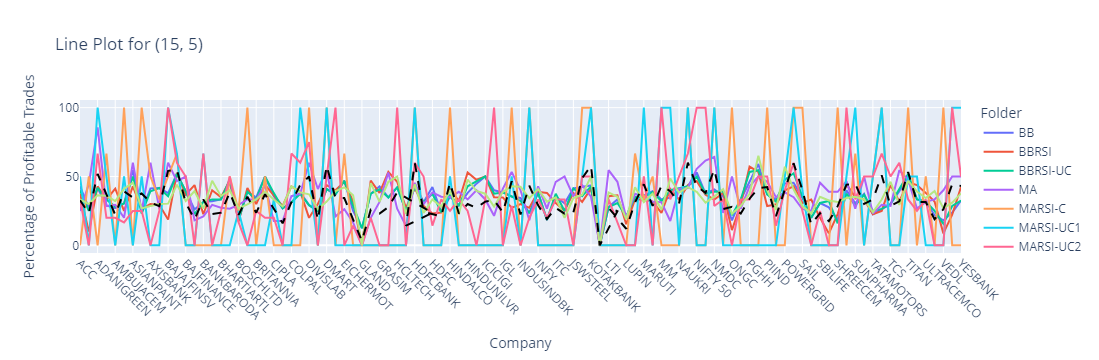

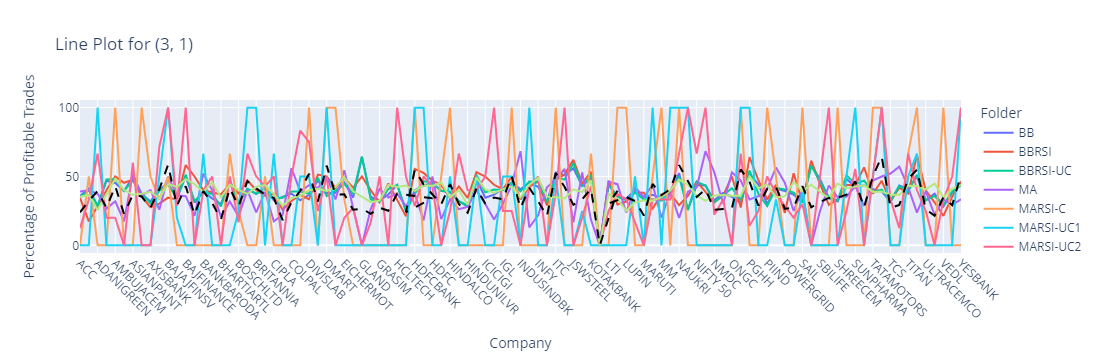

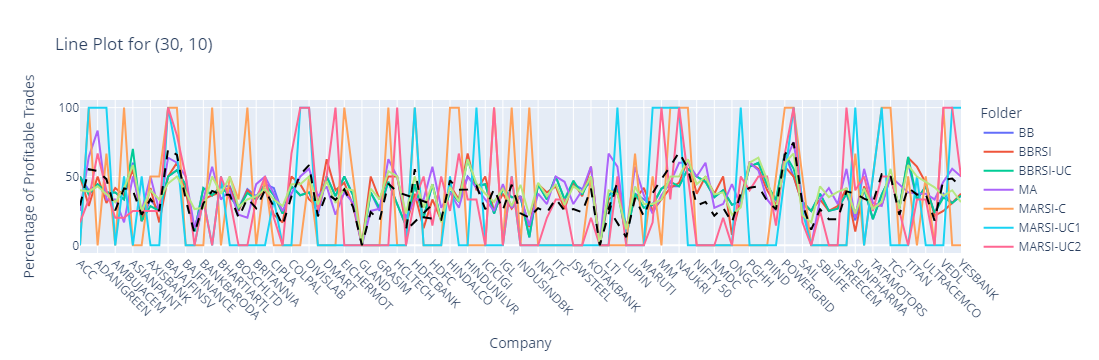

In [77]:
import pandas as pd
import plotly.express as px

# Assuming dfs is your dictionary of DataFrames

# Iterate through each DataFrame in the dictionary
for df_name, df in dfs.items():
    # Extract company names and folder values
    companies = df.iloc[:, :-1]
    folders = df.iloc[:, -1]

    # Create a DataFrame for plotting
    plot_data = pd.DataFrame(columns=['Company', 'Folder', 'Value'])
    
    for company in companies.columns:
        company_data = pd.DataFrame({
            'Company': [company] * len(folders),
            'Folder': folders.values,
            'Value': df[company]
        })
        plot_data = pd.concat([plot_data, company_data])

    # Convert 'Folder' column to categorical with specified order
    plot_data['Folder'] = pd.Categorical(plot_data['Folder'], categories=sorted(folders.unique()))

    # Plotting using Plotly line plot
    fig = px.line(plot_data, x='Company', y='Value', color='Folder',
                  title=f'Line Plot for {df_name}',
                  labels={'Value': 'Percentage of Profitable Trades'})

    # Calculate average values for each company
    avg_values = plot_data.groupby('Company')['Value'].mean().reset_index()

    # Add average line to the plot
    fig.add_trace(px.line(avg_values, x='Company', y='Value').update_traces(line=dict(color='black', dash='dash'))['data'][0])

    # Rotate x-axis labels for better readability
    fig.update_layout(xaxis=dict(tickangle=45, tickmode='array'))

    # Show the plot
    fig.show()


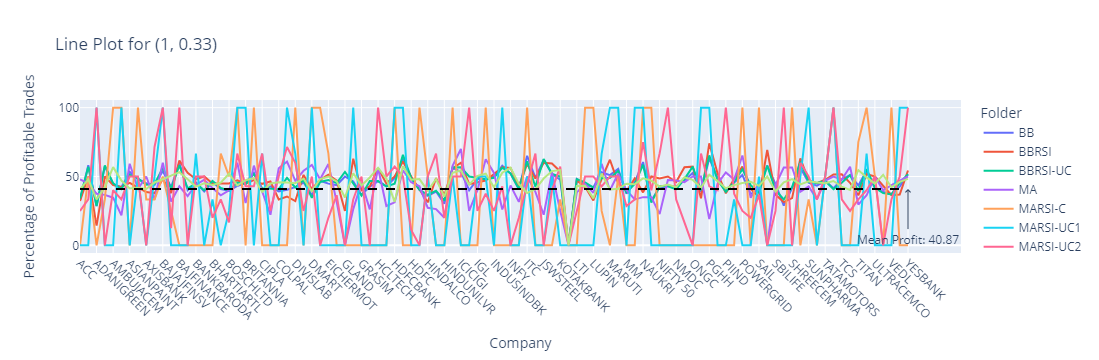

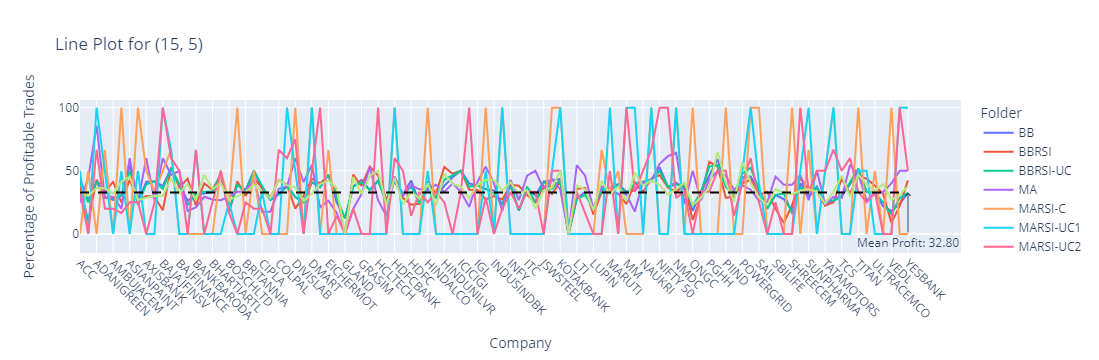

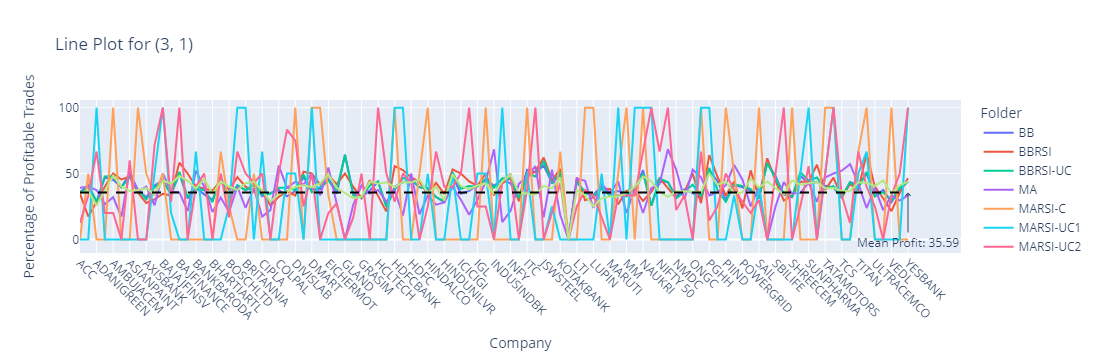

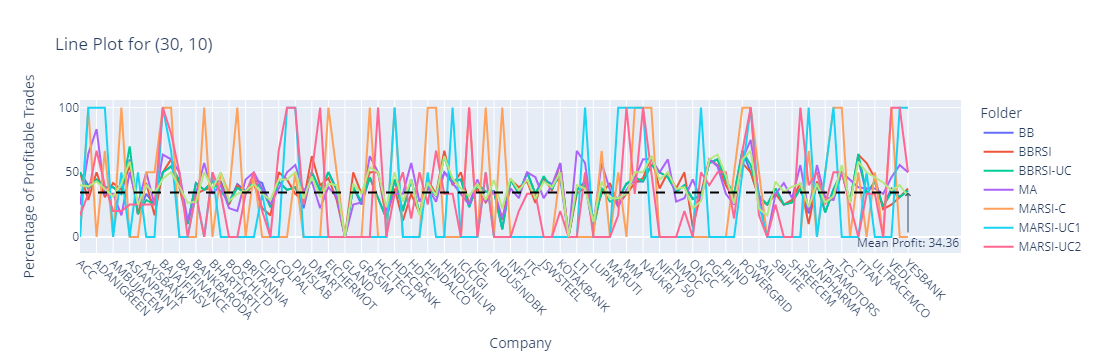

In [103]:
# Iterate through each DataFrame in the dictionary
for df_name, df in dfs.items():
    # Extract company names and folder values
    companies = df.iloc[:, :-1]
    folders = df.iloc[:, -1]

    # Create a DataFrame for plotting
    plot_data = pd.DataFrame(columns=['Company', 'Folder', 'Value'])
    
    for company in companies.columns:
        company_data = pd.DataFrame({
            'Company': [company] * len(folders),
            'Folder': folders.values,
            'Value': df[company]
        })
        plot_data = pd.concat([plot_data, company_data])

    # Convert 'Folder' column to categorical with specified order
    plot_data['Folder'] = pd.Categorical(plot_data['Folder'], categories=sorted(folders.unique()))

    # Plotting using Plotly line plot
    fig = px.line(plot_data, x='Company', y='Value', color='Folder',
                  title=f'Line Plot for {df_name}',
                  labels={'Value': 'Percentage of Profitable Trades'})

    # Calculate average values for each company
    avg_values_company = plot_data.groupby('Company')['Value'].mean().reset_index()

    # Calculate the overall mean
    overall_mean = plot_data['Value'].mean()

    # Add a separate trace for the overall mean
    fig.add_trace(px.line(x=avg_values_company['Company'], y=[overall_mean] * len(avg_values_company)).update_traces(line=dict(color='black', dash='dash'))['data'][0])
    fig.add_annotation(x=avg_values_company['Company'].iloc[-1], y=overall_mean,
                       text=f'Mean Profit: {overall_mean:.2f}', showarrow=True,
                       arrowhead=4, ax=0, ay=50)
    # Rotate x-axis labels for better readability
    fig.update_layout(xaxis=dict(tickangle=45, tickmode='array'))

    # Show the plot
    fig.show()